In [1]:
#from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Let's load the Nashville zipcode data and look at the first few rows
- geopandas reads files with the `read_file()` method
- The zipcode data was downloaded from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku


In [2]:
Zip_Code_Boundaries = gpd.read_file('../art_per_zip/Zip_Code_Boundaries.geojson')
print(Zip_Code_Boundaries.crs)
Zip_Code_Boundaries.head( )

EPSG:4326


,OBJECTID,ZipCode,POName,GlobalID,geometry
0,229,37115,MADISON,9492b2a0-dff5-4e2e-b77b-37c25b5c96f3,"POLYGON ((-86.68725 36.31821, -86.68722 36.318..."
1,230,37206,NASHVILLE,3a287c8d-543c-4f6e-8463-27bf9c3d8356,"POLYGON ((-86.75348 36.16274, -86.75383 36.162..."
2,231,37216,NASHVILLE,c3501fa2-5146-4881-95ac-0f36b9da82af,"POLYGON ((-86.73451 36.23774, -86.73425 36.237..."
3,232,37213,NASHVILLE,b50f3ab3-9571-4457-b059-68ef9bd0b13a,"POLYGON ((-86.77787 36.17706, -86.77810 36.176..."
4,233,37086,LA VERGNE,c3ccae22-29a2-4599-9241-72cddd64a35a,"POLYGON ((-86.58870 36.02671, -86.58837 36.026..."


In [3]:
type(Zip_Code_Boundaries)

geopandas.geodataframe.GeoDataFrame

#### Now let's look at the difference between calling the first geometry variable.....


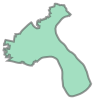

In [4]:
Zip_Code_Boundaries.loc[0, 'geometry']

#### ...and printing it


In [5]:
print(Zip_Code_Boundaries.loc[0, 'geometry'])

POLYGON ((-86.6872490902623 36.3182121225898, -86.6872165943563 36.3182105624904, -86.6871818213919 36.3182087819047, -86.6871470811249 36.318206919112, -86.6871123058618 36.3182050015336, -86.6870775641674 36.3182029738052, -86.6870428217634 36.3182008640597, -86.6870348093141 36.3182003643403, -86.6870080788765 36.3181986984312, -86.6869733695666 36.318196423554, -86.6869386584338 36.318194066666, -86.686903946584 36.3181916268596, -86.6868692685382 36.3181891039388, -86.6868345563761 36.3181864991906, -86.6867998757988 36.3181838122417, -86.6867652301394 36.3181810421722, -86.6867305492426 36.3181781893804, -86.6866959008102 36.3181752273464, -86.6866612864246 36.3181722101345, -86.6866266713228 36.3181691100044, -86.6865920543993 36.3181659278635, -86.686557437639 36.3181626357625, -86.6865228538202 36.3181592893914, -86.686488270157 36.318155832159, -86.6864537194277 36.3181523197553, -86.6864191668771 36.3181487253409, -86.6863846144826 36.3181450200653, -86.68635009503 36.318141

#### Plotting a GeoDataFrame is as easy as calling the GeoPandas .plot() function


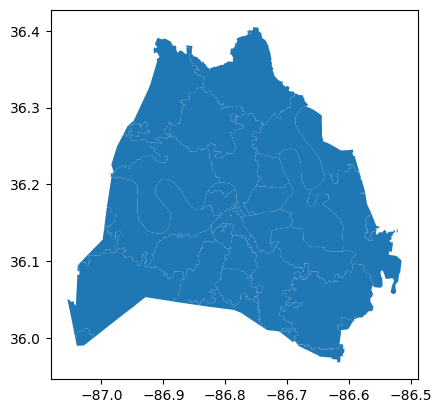

In [6]:
Zip_Code_Boundaries.plot();

#### Add information and styling 
- set the `column =` to a column in the GeoDataFrame to color by
- change the [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) 
- pass in keywords to tweak the legend created by [`matplotib`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


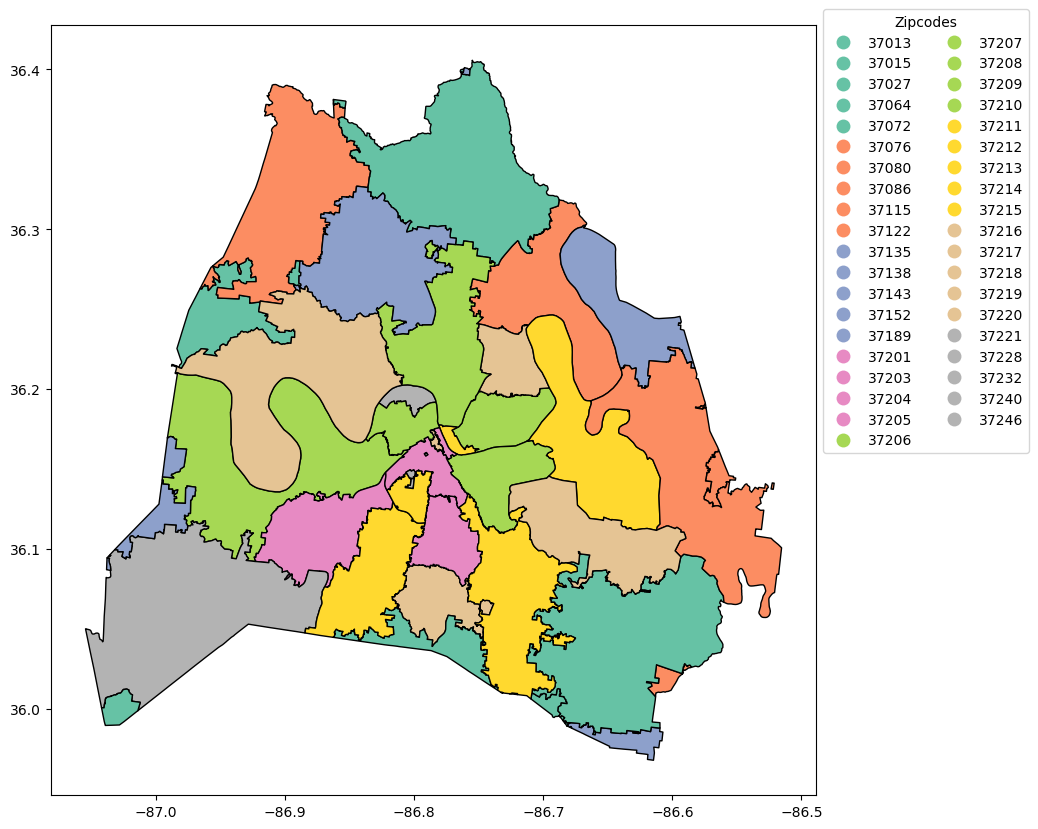

In [7]:
#geopandas will take care of legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
           'bbox_to_anchor': (1, 1.03), 'ncol': 2}

Zip_Code_Boundaries.plot(column = 'ZipCode', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

#### Next you will read in the bus stop data
- downloaded from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd
- cleaned:
    - rename columns 
    - drop unwanted columns 
    - parse `lat` and `lng` columns from `location`
- print the shape 
- take a look at the first 3 rows

In [8]:
art = gpd.read_file('../art_per_zip/Metro_Arts_Public_Artwork_view.geojson')
print(art.crs)
art.head()

EPSG:4326


,ArtworkName,LastName,FirstName,Location,Medium,Status,Description,WebLink,GlobalID,OBJECTID,geometry
0,The Riders,Conley,Seth,Shelby Street Pedestrian Bridge,tube steel,Complete,None,https://www.metroartsnashville.com/fullscreen-...,689f0b8e-4c3f-4275-a14b-4404fd0a2341,1,POINT Z (-86.76936 36.16431 0.00000)
1,Banjo,Howse,Ric,Richard H. Fulton Complex,powder coated steel,Complete,None,https://www.metroartsnashville.com/fullscreen-...,5045f988-ab35-4abc-b8a6-4a58304db670,2,POINT Z (-86.76864 36.15335 0.00000)
2,Divine Channel,Krebs,Katherine,Metro Office Building,mixed media on panel,Complete,This body of work focuses on transitions in th...,https://www.metroartsnashville.com/fullscreen-...,314289c1-e83c-4fb1-b576-618ce12bd88e,3,POINT Z (-86.76880 36.15312 0.00000)
3,Good Eats,Henderson,Wayne,21st Ave. and Broadway,"powder coated stainless steel, stainless steel...",Complete,None,https://www.metroartsnashville.com/fullscreen-...,750a1d54-53c7-4623-936a-48767bcdb56d,4,POINT Z (-86.79971 36.14833 0.00000)
4,Dancing in the Streets of Music City,McBride,Michael J.,Historic Metro Courthouse,acrylic on canvas,Complete,"Created during a live painting exhibition, thi...",https://www.metroartsnashville.com/fullscreen-...,8d6aa764-20f4-4a1d-add4-6f78ba1400d4,5,POINT Z (-86.77829 36.16675 0.00000)


In [9]:
art.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ArtworkName  178 non-null    object  
 1   LastName     178 non-null    object  
 2   FirstName    177 non-null    object  
 3   Location     178 non-null    object  
 4   Medium       178 non-null    object  
 5   Status       178 non-null    object  
 6   Description  171 non-null    object  
 7   WebLink      178 non-null    object  
 8   GlobalID     178 non-null    object  
 9   OBJECTID     178 non-null    int64   
 10  geometry     177 non-null    geometry
dtypes: geometry(1), int64(1), object(9)
memory usage: 15.4+ KB


In [10]:
#bus_stops['geometry'] = bus_stops.apply(lambda x: Point((x.lng, 
#                                                         x.lat)), 
#                                        axis=1)
#bus_stops.head(3)

- you want the CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame 


In [11]:
art.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### The `GeoDataFrame()` constructor needs 3 parameters:
 - a DataFrame
 - a coordinate reference system
 - a geometry (we will use the geopandas `points_from_xy()` method to create a Point geometry)

In [12]:
art_zip = gpd.GeoDataFrame(art, 
                           crs = Zip_Code_Boundaries.crs, 
                           #geometry = gpd.points_from_xy(bus_stops.lng, bus_stops.lat)
                          )

In [13]:
type(art_zip)

geopandas.geodataframe.GeoDataFrame

#### Now you are ready to combine bus stops and zipcodes with a spatial join
- first a little clean up for the zipcodes
    - just keep the zip, po_name, and geometry columns
- then construct the join 
    - keep in mind that you want to find the **bus stops within a zip code polygon**
    - the geometry for the new (combined) GeoDataFrame comes from the left GeoDataFrame


In [14]:
#zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [15]:
art_by_zip = gpd.sjoin(art, Zip_Code_Boundaries, predicate = 'within')

In [16]:
art_by_zip.head()

,ArtworkName,LastName,FirstName,Location,Medium,Status,Description,WebLink,GlobalID_left,OBJECTID_left,geometry,index_right,OBJECTID_right,ZipCode,POName,GlobalID_right
0,The Riders,Conley,Seth,Shelby Street Pedestrian Bridge,tube steel,Complete,None,https://www.metroartsnashville.com/fullscreen-...,689f0b8e-4c3f-4275-a14b-4404fd0a2341,1,POINT Z (-86.76936 36.16431 0.00000),3,232,37213,NASHVILLE,b50f3ab3-9571-4457-b059-68ef9bd0b13a
1,Banjo,Howse,Ric,Richard H. Fulton Complex,powder coated steel,Complete,None,https://www.metroartsnashville.com/fullscreen-...,5045f988-ab35-4abc-b8a6-4a58304db670,2,POINT Z (-86.76864 36.15335 0.00000),11,240,37210,NASHVILLE,8ddd304a-d74e-48e4-931b-424102f9485a
2,Divine Channel,Krebs,Katherine,Metro Office Building,mixed media on panel,Complete,This body of work focuses on transitions in th...,https://www.metroartsnashville.com/fullscreen-...,314289c1-e83c-4fb1-b576-618ce12bd88e,3,POINT Z (-86.76880 36.15312 0.00000),11,240,37210,NASHVILLE,8ddd304a-d74e-48e4-931b-424102f9485a
3,Good Eats,Henderson,Wayne,21st Ave. and Broadway,"powder coated stainless steel, stainless steel...",Complete,None,https://www.metroartsnashville.com/fullscreen-...,750a1d54-53c7-4623-936a-48767bcdb56d,4,POINT Z (-86.79971 36.14833 0.00000),35,264,37240,NASHVILLE,e7c0c530-ddcf-42bf-b66f-cb88443149a5
4,Dancing in the Streets of Music City,McBride,Michael J.,Historic Metro Courthouse,acrylic on canvas,Complete,"Created during a live painting exhibition, thi...",https://www.metroartsnashville.com/fullscreen-...,8d6aa764-20f4-4a1d-add4-6f78ba1400d4,5,POINT Z (-86.77829 36.16675 0.00000),13,242,37201,NASHVILLE,327e57ac-27b7-4c13-b7bc-0505cf155803


#### Now that the data is joined spatially you can count the bus stops by zip code  and see how many stops are within each polygon 
- using the `value_counts()` method


In [17]:
art_by_zip['ZipCode'].value_counts()

ZipCode
37201    43
37013    32
37115    31
37210    22
37208     9
37209     6
37219     6
37203     5
37206     3
37221     3
37138     2
37213     2
37072     2
37214     2
37240     1
37204     1
37217     1
37211     1
37212     1
37228     1
37076     1
37218     1
Name: count, dtype: int64

#### Let's take a closer look at the 272 bus stops in the 37207 zip code
- filter the stops_by_zip data to just get bus stops in 37207
- filter the zip code geodataframe to just the polygon (row) for 37207


In [18]:
art_by_zip_37201 = art_by_zip.loc[art_by_zip['ZipCode'] == '37201']
art_by_zip_37201.shape

(43, 16)

In [19]:
polygon37201 = Zip_Code_Boundaries.loc[Zip_Code_Boundaries['ZipCode'] == '37201']
polygon37201.shape

(1, 5)

#### Now plot these two together
- first plot the polygons for 37207 and make them light green
- next plot the points for the bus stops and color them by route

In [20]:
#fig, ax = matplotlib.subplots()
#ax = polygon37201.plot(figsize = (8, 10), color = 'lightgreen')
#art_by_zip_37201.plot( ax = ax, column = 'route');
#plt.show();

#### We're getting there! It would be helpful to have streets, though wouldn't it? We can add a street map with the folium package.

#### folium maps require a center point for the street map. 
- Make use of a GeoSeries attribute (.centroid) which gives the center of a polygon
- Since there are two polygons which should we use?

In [21]:
art_by_zip.geometry.centroid

/var/folders/m_/mtd6n2f104s3kc51kg62y0_r0000gn/T/ipykernel_18879/2400580440.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  art_by_zip.geometry.centroid


0      POINT (-86.76936 36.16431)
1      POINT (-86.76864 36.15335)
2      POINT (-86.76880 36.15312)
3      POINT (-86.79971 36.14833)
4      POINT (-86.77829 36.16675)
                  ...            
172    POINT (-86.77829 36.16675)
173    POINT (-86.77829 36.16675)
174    POINT (-86.71545 36.25756)
175    POINT (-86.72992 36.16838)
176    POINT (-86.67006 36.26575)
Length: 176, dtype: geometry

In [22]:
#find the center of the larger (more southern) polygon and look at it
center = art_by_zip.geometry.centroid[176]
print(center)

POINT (-86.6700600004388 36.2657520003582)


/var/folders/m_/mtd6n2f104s3kc51kg62y0_r0000gn/T/ipykernel_18879/389275642.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = art_by_zip.geometry.centroid[176]


#### Folium requires a location point as an array 
- with *latitude* first
- but shapely Points have *longitude* first 

In [23]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.2657520003582, -86.6700600004388]


#### To create a folium map just call the folium `Map()` constructor
- `location` is the only argument required by the constructor
    - Set `area_center` as the `location` of the folium map. 
- `zoom_start` is an optional argument 
    - A setting of 12 should get us nice and close

In [24]:
#create our map of Nashville Zip Code 37207 and show it
map_37201 = folium.Map(location =  area_center, zoom_start = 12)
map_37201

#### Next, let's add our 37207 polygon and bus stop markers.

#### `itterows()` is a generator that iterates through the rows of a DataFrame and returns a tuple with the row id and row values. 
- Below, we are printing the row values for the first 3 row as we iterate through the GeoDataFrame of bus stops in 37207. 
- This idea will be helpful for creating our markers!

In [42]:
i = 0
for row_index, row_values in art_by_zip_37201.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values[10])
        print('------------------------- ')
        i+=1

index is 4
values are:
 
POINT Z (-86.7782859996831 36.166746999615 0)
------------------------- 
index is 5
values are:
 
POINT Z (-86.7782859996831 36.166746999615 0)
------------------------- 
index is 10
values are:
 
POINT Z (-86.7782859996831 36.166746999615 0)
------------------------- 


/var/folders/m_/mtd6n2f104s3kc51kg62y0_r0000gn/T/ipykernel_18879/1083647867.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(row_values[10])


#### Create map_37207 again with additional features:
- add the zipcode area outline (polygon_37207)
- iterate through the stops_in_37207 to
    - create location from each lat and lng
    - create a popup from the stop column
    - create a custom icon if you want with [font-awesome](https://fontawesome.com/v4.7.0/icons/)
    - build a marker from each location and popup and (optionally) your custom icon 
    - add the marker to  `map_37207`
- display `map_37207`

In [48]:
art_by_zip['geometry'] = art_by_zip['geometry'].astype(str)

In [49]:
art_by_zip[['point', 'z']] = art_by_zip['geometry'].str.split(' ', expand=True)

ValueError: Columns must be same length as key

In [26]:
#draw our zip code area: 37207
map_37201 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37201).add_to(map_37201)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in art_by_zip_37201.iterrows():
    loc = [row_values['geometry'],row_values['geometry']]
    pop = str(row_values['ArtworkName'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37201)
map_37201.save('../maps/map37201.html')

#display our map
map_37201

ValueError: Location should consist of two numerical values, but '8d6aa764-20f4-4a1d-add4-6f78ba1400d4' of type <class 'str'> is not convertible to float.

#### If you have a lot of markers, you might want to use marker clusters
- Folium has `MarkerCluster()` and `FastMarkerCluster()`
- Construct a `MarkerCluster()` 
    - construct a `MarkerCluster()` and `.add_to()` the map
    - when you loop through the data and create markers add those to the marker cluster
- Construct a `FastMarkerCluster()` by passing a list of locations

#### You can save your map as an html file and it will retain the interactive qualities

In [26]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

In [27]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37207.save('../maps/cluster37207.html')

cluster_map_37207  

In [28]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37207[['lat', 'lng']].values.tolist()
map_37207.add_child(
    FastMarkerCluster(locations)
)



#display our map
map_37207